# Lab 2: Unsupervised Learning

The focus of this lab is to present the tools for conducting Unsupervised learning and specifically clustering using Python.
We will implement Kmeans and use sklearn to apply K-medoids, Kmeans, Hierarchical clustering and several clustering evaluation metrics. Linked with the topic of this lab is HW2. Additionally, this lab includes a practice assignment (under the name Lab2_practice.ipynb) for whomever is interested in starting practicing on unsupervised learning before HW2. The practice assignment is not mandatory and it will not be graded while the solutions will be discussed in Q&A session for lab2. 



**Outline:**

1. K-means (sklearn)
2. K-means algorithm implementation (with random initialization) using pandas and numpy
3. K-means caveats
4. K-medoids
5. Evaluation metrics

- Clustering on iris dataset


6. K-means, K-medoids, evaluation metrics and plotting with high-dimensional data
7. Agglomerative Clustering and Dendrogram

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


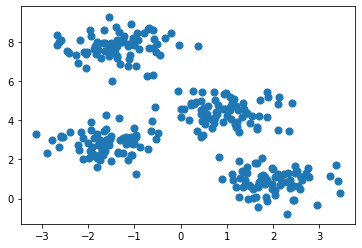

In [2]:
#Create Data
#make_blobs( )generates  Gaussian blobs ideal for clustering.
#link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#the random state determines a random number generation for dataset creation. Essentially it generates a seed so that your results is always deterministic

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

#scatterplot to visualize the blobs
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='rainbow');


In [3]:
#y_true are the integer labels for cluster membership of each sample
y_true

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

## 1. Kmeans (sklearn)

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. 

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically

In [4]:
#import KMeans
from sklearn.cluster import KMeans
#Initialize a KMeans object, parameters of KMeans include the number of clusters and the initialization method

#Method for initialization: default is kmeans++

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

#‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.


kmeans = KMeans(n_clusters=4)

#compute kmeans clustering
kmeans.fit(X)
#call the kmeans object, predict, to predict the cluster index of each sample. 

y_kmeans = kmeans.predict(X)

#in one step: kmeans.fit_predict(X)

In [5]:
#numpy array of the predicted index or labels for each cluster. Sample 0 is assigned to cluster 0, sample 1 is assigned to cluster 2, sample 2 is assigned to cluster 1 and so on.
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

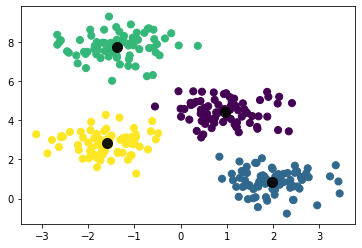

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

#the cluster centers are stored as an attribured of the kmeans object. It will give you the coordinates of the cluster centers
centers = kmeans.cluster_centers_

#so we can plot those too! and make them black so they stand out
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);


In [7]:
centers

array([[ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.


## 2. K-Means implementation (with random initialization)

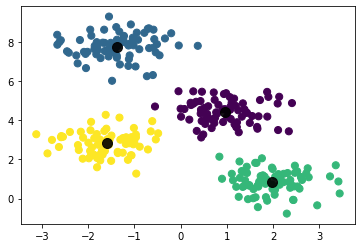

In [8]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np 



def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)#generate a random number
    i = rng.permutation(X.shape[0])[:n_clusters]#randomly permutate the df and get the 4 first elements, these are the first cluster centers-- essentially we suffle the data
    centers = X[i]#store them to an array called centers


    #Now that we generated the random centers we need to assign each point to one of these centers. To do that we need to calculate the distances between points and their closest        centers. we can use sklearns pairwise_distances_argmin method for that.

    #link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        


        # 2b. Find new centers from means of points
        # Next we need to find the new cendroid of each cluster and we can do that by calculating the mean of points

        #so we can say. for i in range of the number of clusters, 
        #calculate the mean of these diffent clusters. so for the data points that belong in cluster 0 and the in cluster 1 and so on

        # Update centroid location using the newly
        # assigned data point classes
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers): #Test whether all array elements evaluate to True.
            break
        centers = new_centers
    
    return centers, labels

    
#plot the centroids also
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);


## 3. CAVEATS of K-means
1. if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results



2. Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters




3. Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. 



4. The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. 

In [9]:
#to demonstrate bullet point 4:
#This dataset from sklearn makes two interleaving half circles

from sklearn.datasets import make_moons
Xx, yy = make_moons(200, noise=.05, random_state=0)

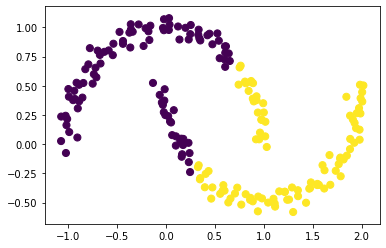

In [10]:

#Run kmeans with n_clusters=2 and plot the results as we did before!

#Kmeans completely failes to find the clusters as the boundaries here are not linear

labels = KMeans(2, random_state=0).fit_predict(Xx)
plt.scatter(Xx[:, 0], Xx[:, 1], c=labels,
            s=50, cmap='viridis');

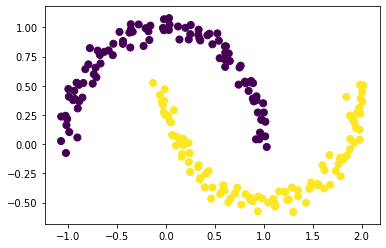

In [11]:
#example of algorithm that would work on this dataset
#DBSCAN 
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=2).fit_predict(Xx)

plt.scatter(Xx[:, 0], Xx[:, 1], c=clustering,
            s=50, cmap='viridis');

## 4. K-medoids 


Kmedoids is similar to Kmeans, Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups). K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster.

In [12]:
#K-medoids is not included in sklearn so download:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


In [13]:
#kmedoids also work with other metrics, like manhattan which is best though for binary data
#here I demonstrate how you can change the metric in kmedoids
kmedoids = KMedoids(n_clusters=4, random_state=0, metric="manhattan")

In [14]:
kmedoids.fit_predict(X)

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

In [15]:
kmedoids.labels_

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

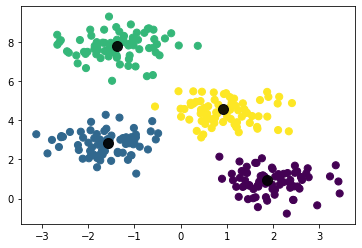

In [16]:
#centroids plot
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_,
            s=50, cmap='viridis');

centers = kmedoids.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);


## 5. Evaluation metrics: Intrinsic and Extrinsic

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. 

Given the knowledge of Grounds truth labels with can use: adjusted rand index. If we do not have the class labels then we can use silhouette score. 
All the previously mentioned metrics can be found and implemented in python from the sklearn library.

In [17]:
from sklearn import metrics
import pandas as pd 

#external measure, given that we have the class labels of the dataset
#Computes how similar are the clusters to a set of given class labels
#Measures the percentage of correct decisions taken by the clustering algorithm

#and Silhouette score is an internal measure in the sense of that clustering is evaluated based on merely the data that
#was used for the clustering, 
#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

def evaluation_metrics(X, labels_pred, labels_true, metric_name):


        s_s = metrics.silhouette_score(X, labels_pred, metric=metric_name)
        a_r_i = metrics.adjusted_rand_score(labels_true, labels_pred)

        metrics_names = ["Silh_S", "Rand_Index"]
        values = [s_s, a_r_i]
        

        result = list(zip(metrics_names,values))
        result = pd.DataFrame(result, columns=['Metric','Value'])

        return result



In [18]:

#Rand index of 1 measn that we have Perfectly matching labelings 
#for silhouette score where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


evaluation_metrics(X, kmeans.labels_, y_true, "euclidean" )

,Metric,Value
0,Silh_S,0.681994
1,Rand_Index,1.000000


In [19]:
evaluation_metrics(X, kmedoids.labels_, y_true, "manhattan")


,Metric,Value
0,Silh_S,0.683414
1,Rand_Index,1.000000


## Clustering on iris dataset


## 6. K-means, K-medoids, evaluation metrics and plotting with high-dimensional data

In [20]:
from sklearn import datasets

In [21]:

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [22]:
#NOTE that if your variables are of incomparable units, before clustering you need to standardize them! Example: some variables are in cm and some other are in kg. 
#if you would standardize the iris dataset for example:
#from sklearn.preprocessing import StandardScaler

#sd = StandardScaler()
#X=sd.fit_transform(X)
#and then you would use the standardized version of X to call the attribute fit_predict() of your clustering algorithm. 



In [23]:
#NOTE that if you would like to find the optimal number of clusters for your dataset you could run the elbow method for your dataset. 
## Kmeans++
### K-means
kmeans_plus = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_plus.fit_predict(X)
##check the init default value

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [24]:

kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
print("Kmeans \n", evaluation_metrics(X, kmeans_plus.labels_, y, "euclidean"))
print("######")
print("######")
print("Kmedoids \n", evaluation_metrics(X, kmedoids.labels_, y, "euclidean"))


Kmeans 
        Metric     Value
0      Silh_S  0.552819
1  Rand_Index  0.730238
######
######
Kmedoids 
        Metric     Value
0      Silh_S  0.520198
1  Rand_Index  0.758338


In [26]:
#Plotting multi-dimensional datasets with more than two attributes is not as trivial. You can always reduce the dimensionality of the feature space by applying PCA on the dataset and plot the resulting principal components. 

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

Text(0.5, 1.0, &#39;Reference plot&#39;)

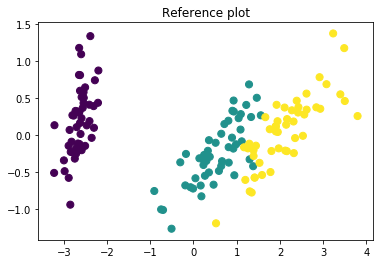

In [27]:
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y, s=50, cmap='viridis');
plt.title("Reference plot")


Text(0.5, 1.0, &#39;K means&#39;)

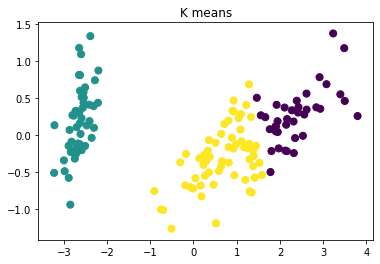

In [28]:
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans_plus.labels_, s=50, cmap='viridis');
plt.title("K means")


Text(0.5, 1.0, &#39;K medoids&#39;)

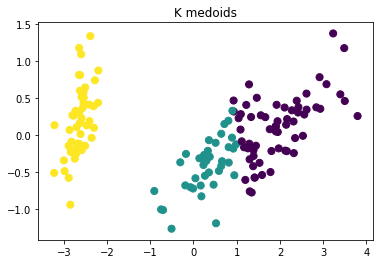

In [29]:
"""
According to the evaluation metrics there should not be much of a difference between the results. And apparently there are a couple of points that Kmeans assigns them to one cluster while Kmedoids assigns them to the other cluster.

"""

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmedoids.labels_, s=50, cmap='viridis');
plt.title("K medoids")



## 7. Agglomerative Clustering and Dendrogram

In [30]:

from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)


Let's also try complete and average linkages

The code below, conducts hierarchical clustering with complete linkage, stores the predicted labels in the variable complete_pred. It also conducts hierarchical clustering with average linkage and stores the predicted labels in the variable avg_pred

Note: look at the documentation of AgglomerativeClustering for more information about the appropriate value to pass as the linkage value

In [31]:
# Hierarchical clustering using complete linkage
# Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
# Fit & predict
complete_pred = complete.fit_predict(X)



# Hierarchical clustering using average linkage
# Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
# Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(X)

In [32]:
ward_score = evaluation_metrics(X, ward_pred, y, "euclidean")
complete_score = evaluation_metrics(X, complete_pred, y, "euclidean")
avg_score = evaluation_metrics(X, avg_pred, y, "euclidean")

In [33]:
complete_score

,Metric,Value
0,Silh_S,0.513595
1,Rand_Index,0.642251


In [34]:
ward_score

,Metric,Value
0,Silh_S,0.554324
1,Rand_Index,0.731199


### Dendrogram visualization with scipy


The nice thing about hierarchical clustering is that it provides a complete dendrogram illustrating the relationships between clusters in our data. 
Let's visualize the highest scoring clustering result.

To do that, we'll need to use Scipy's linkage function to perform the clustering again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [35]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'average'

linkage_matrix = linkage(X, linkage_type)

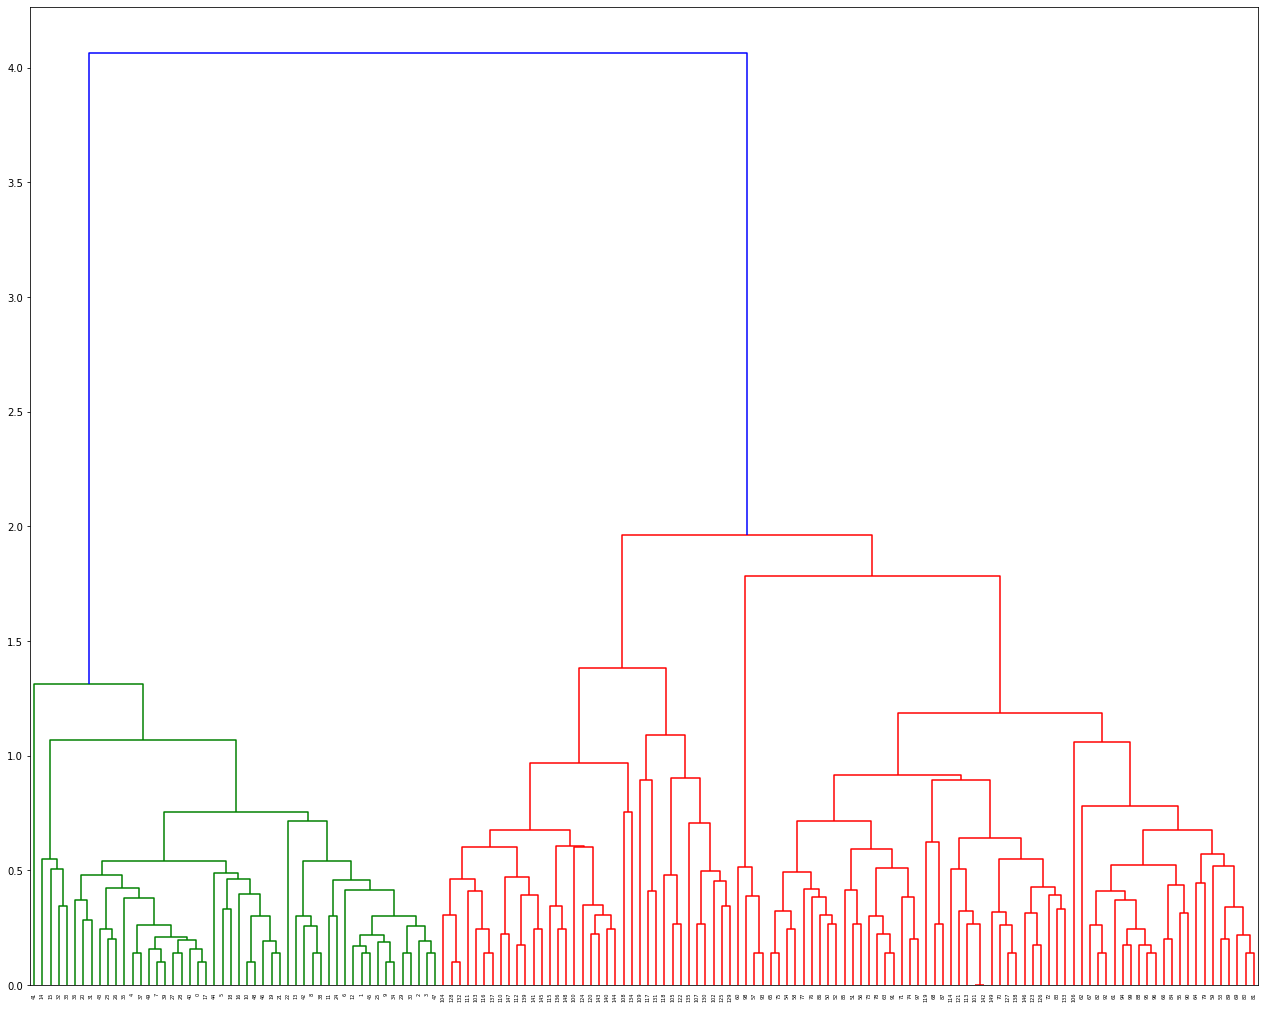

In [36]:
#Plot using scipy's dendrogram function
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()


#On the x axis you see labels which are the indices of your samples in X. On the y axis you see the distances (of the 'ward' method in our case).

#Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells you about the distance at which this label was #merged into another label or cluster. You can find that other cluster by following the other vertical line down again. If you don't encounter another horizontal line, it was just #merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

We can use a dendogram  to choose a number of the cluster for our data. Remember, a dendrogram only shows us the hierarchy of our data; it does not exactly give us the most optimal number of clusters.


In order to identify clusters, we can cut the dendrogram horizontaly. The height of the cut to the dendrogram controls the number of clusters obtained. we can choose the cut-off point that cut the tallest vertical line

# END OF LAB 2